# Assignment 2

Authors: Akos Engelmann, Gergely Parady, Ipek Cakin, Simon Jasansky

Types:
1. Paper (<http://MAGexample.org/type/paper>)
2. Author (<http://MAGexample.org/type/author>)
3. Domain (<http://MAGexample.org/type/domain>)
4. Affiliation (<http://MAGexample.org/type/affiliation>)
5. Conference (<http://MAGexample.org/type/conference>)

Properties
1. memberOf <http://www.w3.org/ns/org#memberOf> (author memberOf affiliation)
2. hascreator <http://purl.org/dc/terms/creator> (paper creator author)
3. appearsInConferenceSeries <https://makg.org/property/appearsInConferenceSeries>
(paper appearsInConferenceSeries conference)
4. hasDiscipline <http://purl.org/spar/fabio/hasDiscipline> (paper hasDiscipline domain)
5. hasCoauthor <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> (author coauthor
author)
6. cites <http://purl.org/spar/cito/cites> (paper cites paper)
7. a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>

## Task 1

In the first task, we are supposed to define rules for relations between subjects and objects. 

In [ ]:
# read the graph so that we can then test the queries
import pandas as pd
import numpy as np
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.namespace import XSD, RDF, RDFS
from rdflib import Graph
from urllib.parse import quote

In [ ]:
g = Graph()
g.parse("train.nt", format="nt")
output = g.serialize(format='ttl')
g.serialize("train.ttl")
print(output[0:1000])

In [15]:
len(g)

89253

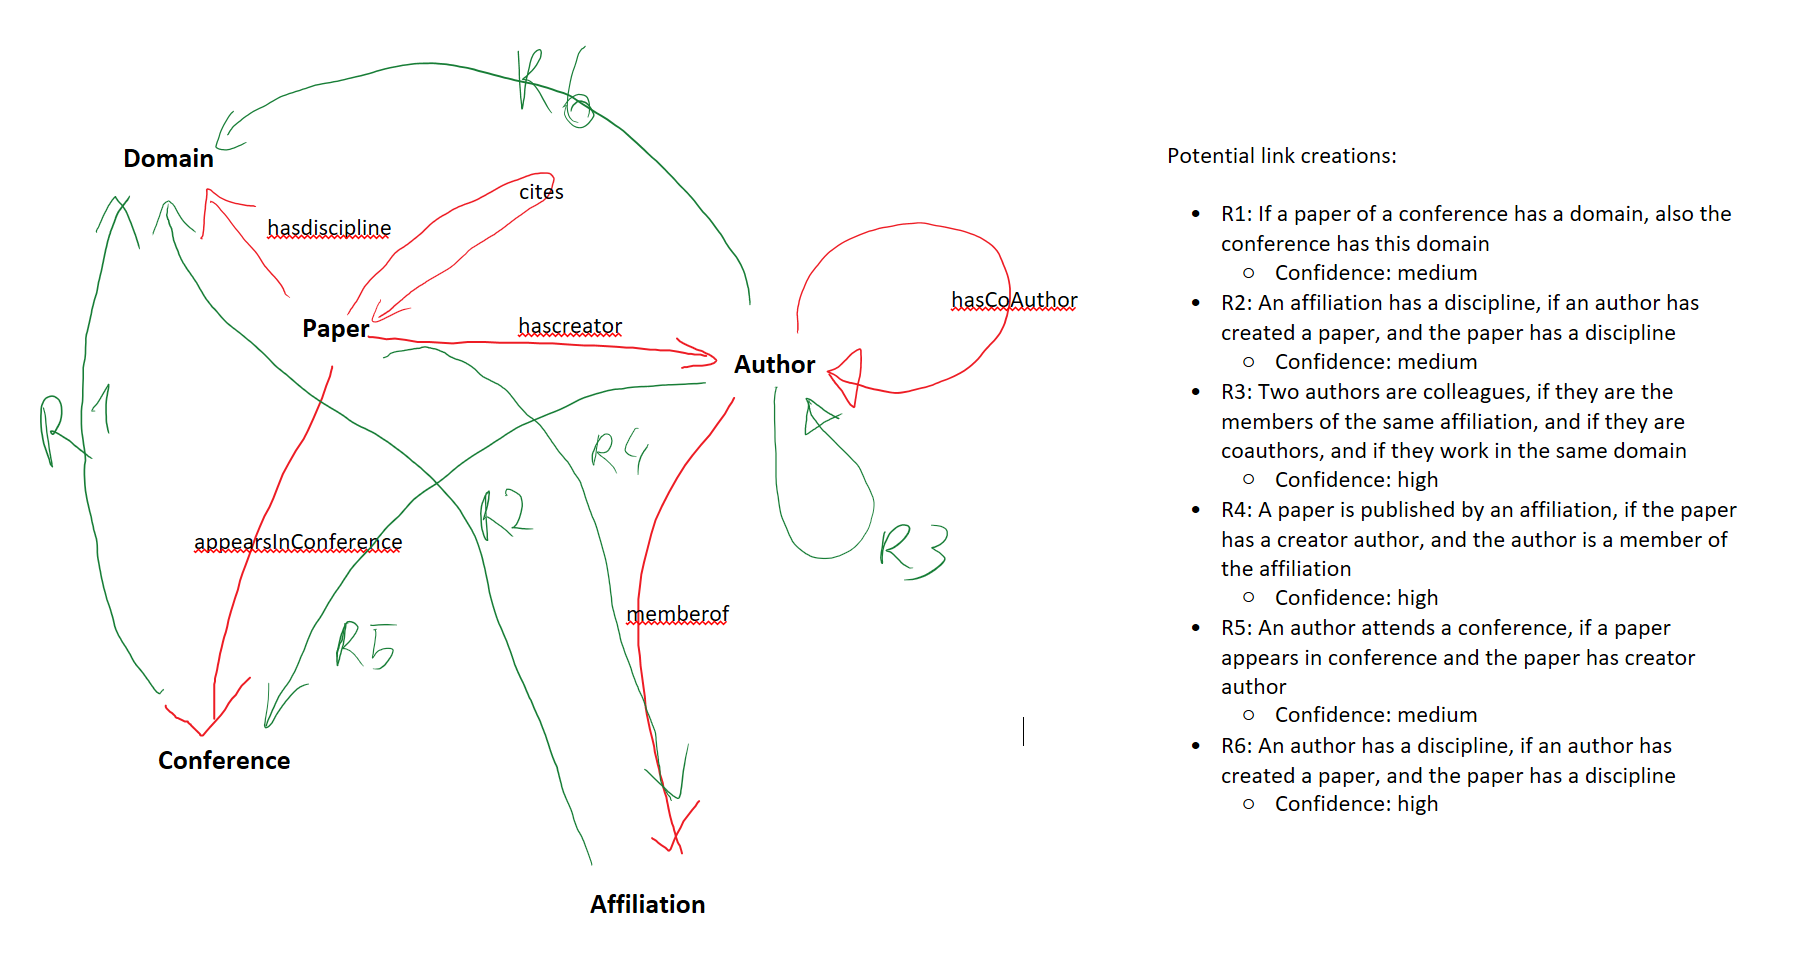

# Rules that we could implement
• R1: If a paper of a conference has a discipline domain, also the conference has discipline domain
	○ Confidence: medium
• R2: An affiliation has a discipline, if an author has created a paper, and the paper has a discipline
	○ Confidence: medium
• R3: An author has a discipline, if an author has created a paper, and the paper has a discipline
	○ Confidence: high
• R4: A paper is published by an affiliation, if the paper has a creator author, and the author is a member of the affiliation
	○ Confidence: medium
• R5: An author attends a conference, if a paper appears in conference and the paper has creator author
	○ Confidence: medium
• R6: Two authors are colleagues, if they are the members of the same affiliation, and if they are coauthors, and if they work in the same domain
	○ Confidence: high


## 1. Rule
R1: If a paper of a conference has a domain, also the conference has this domain

Quality: medium. Reason for quality: it could be that the domain of a paper is not the main domain of the conference, but its just somehow related.

Horn Rule:
 
:conferenceA hasDiscipline :domainX <= :somepaper appearsInConferenceSeries :conferenceA, :somepaper hasDiscipline :domainX

In [23]:
query1 = """
INSERT {
    ?conferenceA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
} 
WHERE {
    ?somepaper <https://makg.org/property/appearsInConferenceSeries> ?conferenceA .
    ?somepaper <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query1)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 89253 triples before insertion
The graph contains 94404 triples after insertion
That means 5151 triples were inserted


## 2. Rule

R2: An affiliation has a discipline, if an author has created a paper, and the paper has a discipline

Quality: medium. Reason for quality: it could be that the domain of a paper is not the main domain of the affiliation (university), but its just somehow related.

Horn Rule

:affiliationQ hasDiscipline: domainX <= paperA hascreator: authorA, paperA hasDiscipline: domainX, authorA memberOf: affiliationQ

In [28]:
query2 = """
INSERT {
    ?affiliationQ <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
WHERE {
    ?paperA <http://purl.org/dc/terms/creator> ?authorA .
    ?paperA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
    ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationQ .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query2)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 94404 triples before insertion
The graph contains 113219 triples after insertion
That means 18815 triples were inserted


## 3. Rule

R3: An author has a discipline, if an author has created a paper, and the paper has a discipline

Quality: High. Reason for quality: it could be that the domain of a paper is not the main domain of the author, but the author just supervised the paper or only gave comments or improvement points to the main authors of the paper but still appears as an author. 

Horn Rule
:authorA hasDiscipline domainX <= :paperA hasDiscipline domainX, :paperA hascreator :authorA

In [29]:
query3 = """
INSERT {
  ?authorA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
}
WHERE {
  ?paperA <http://purl.org/spar/fabio/hasDiscipline> ?domainX .
  ?paperA <http://purl.org/dc/terms/creator> ?authorA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query3)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 113219 triples before insertion
The graph contains 155148 triples after insertion
That means 41929 triples were inserted


## 4. Rule

R4: A paper is published by an affiliation, if the paper has a creator author, and the author is a member of the affiliation

Quality: medium

Horn Rule:

:paperA hasAffiliation :affiliationQ <= :paperA hascreator :authorA, :authorA memberOf :affiliationQ

In [30]:
query4 = """
INSERT {
  ?paperA <http://MAGexample.org/hasAffiliation> ?affiliationQ .
}
WHERE {
  ?paperA <http://purl.org/dc/terms/creator> ?authorA .
  ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationQ .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query4)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 155148 triples before insertion
The graph contains 163450 triples after insertion
That means 8302 triples were inserted


## 5. Rule

R5: An author attends a conference, if a paper appears in conference and the paper has creator author

Quality: medium

Horn Rule:

:authorA attendsConference conferenceZ <= :paperC appearsInConferenceSeries conferenceZ, :paperC hascreator authorA

In [32]:
query5 = """
INSERT {
    ?authorA <https://makg.org/property/attends> ?conferenceZ .
}
WHERE {
    ?paperC <https://makg.org/property/appearsInConferenceSeries> ?conferenceZ .
    ?paperC <http://purl.org/dc/terms/creator> ?authorA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query5)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 163450 triples before insertion
The graph contains 171799 triples after insertion
That means 8349 triples were inserted


## 6. Rule

R6: Two authors are colleagues, if they are the members of the same affiliation, and if they are coauthors, and if they work in the same domain

Quality: high

Horn Rule:

:authorA isColleagueOf :authorB <= :authorA memberOf :affiliationZ, :authorB memberOf :affiliationZ, :authorA coauthor ?authorB, :authorA hasDiscipline :domainA, :authorB hasDiscipline :domainA

In [33]:
query6 = """
INSERT {
  ?authorA <http://MAGexample.org/isColleagueOf> ?authorB .
  ?authorB <http://MAGexample.org/isColleagueOf> ?authorA .
}
WHERE {
  ?authorA <http://www.w3.org/ns/org#memberOf> ?affiliationZ .
  ?authorB <http://www.w3.org/ns/org#memberOf> ?affiliationZ .
  ?authorA <http://lsdis.cs.uga.edu/projects/semdis/opus#coauthor> ?authorB .
  ?authorA <http://purl.org/spar/fabio/hasDiscipline> ?domainA .
  ?authorB <http://purl.org/spar/fabio/hasDiscipline> ?domainA .
}
"""

len_before = len(g)
print("The graph contains {} triples before insertion".format(len_before))

qres = g.update(query6)

len_after = len(g)
print("The graph contains {} triples after insertion".format(len_after))

print("That means {} triples were inserted".format(len_after - len_before))

The graph contains 171799 triples before insertion
The graph contains 180909 triples after insertion
That means 9110 triples were inserted


## Task 2

Association Rule Mining

This is a widely used technique for discovering interesting relationships between different entities in a dataset. It involves identifying frequent itemsets (combinations of entities that co-occur frequently) and then generating association rules between them. In the context of the given knowledge graph, this technique could be used to identify frequent co-occurrences of authors, papers, affiliations, domains, and conferences, and then generate rules based on these co-occurrences.

In [27]:
import itertools

def generate_candidates(rules):
    new_rules = []
    for rule1 in rules:
        for rule2 in rules:
            if rule1 != rule2:
                new_rule = rule1 + rule2[-1:]
                if is_valid_rule(new_rule):
                    new_rules.append(new_rule)
    return new_rules

def is_valid_rule(rule):
    # Check if the rule is valid
    return True

def get_support(rule):
    # Get the support of a rule
    return 1.0

def get_confidence(rule):
    # Get the confidence of a rule
    return 1.0

def prune_rules(rules, min_support, min_confidence):
    # Prune rules based on support and confidence
    pruned_rules = []
    for rule in rules:
        support = get_support(rule)
        confidence = get_confidence(rule)
        if support >= min_support and confidence >= min_confidence:
            pruned_rules.append(rule)
    return pruned_rules

def amie_mining(dataset, min_support, min_confidence):
    # Initialize the set of candidate rules with the singletons
    rules = [[i] for i in dataset]
    pruned_rules = prune_rules(rules, min_support, min_confidence)
    while True:
        new_rules = generate_candidates(pruned_rules)
        if len(new_rules) == 0:
            break
        pruned_rules = prune_rules(new_rules, min_support, min_confidence)
    return pruned_rules


## Task 3

## Task 4